In [ ]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 5.9 MB/s eta 0:00:00


In [ ]:
!pip install PyDrive

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 987.4/987.4 kB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for PyDrive: filename=PyDrive-1.3.1-py3-none-any.whl size=27433 sha256=115415c7a3523020a1588b0fd6466f63fff5aadbfaf9d1a8c87c598c49ada880
  Stored in directory: /root/.cache/pip/wheels/6c/10/da/a5b513f5b3916fc391c20ee7b4633e5cf3396d570cdd74970f
Successfully built PyDrive


In [ ]:
# General-purpose imports
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.parse import quote
import webbrowser
import random
from collections import defaultdict
from base64 import b64decode

# Scikit-learn imports
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder, label_binarize
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

# Imbalanced-learn imports
from imblearn.over_sampling import SMOTE

# TensorFlow and Keras imports
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization,
    Input, LSTM, Attention, Embedding
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array
from tensorflow.keras.applications import VGG16, ResNet50

# Kerastuner imports
from kerastuner.tuners import RandomSearch

# Google Colab imports
from IPython.display import display, Javascript
from google.colab.output import eval_js
from google.colab import files
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Kaggle imports
import kagglehub

/tmp/ipython-input-4145841081.py:36: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch



TRAINING SIMPLE RNN MODEL
Epoch 1/40


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2708/2708 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6342 - loss: 0.9031 - val_accuracy: 0.8063 - val_loss: 0.4986 - learning_rate: 0.0010
Epoch 2/40
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7585 - loss: 0.6178 - val_accuracy: 0.8229 - val_loss: 0.4534 - learning_rate: 0.0010
Epoch 3/40
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7752 - loss: 0.5662 - val_accuracy: 0.8337 - val_loss: 0.4168 - learning_rate: 0.0010
Epoch 4/40
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7896 - loss: 0.5304 - val_accuracy: 0.8429 - val_loss: 0.3964 - learning_rate: 0.0010
Epoch 5/40
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7965 - loss: 0.5118 - val_accuracy: 0.8441 - val_loss: 0.3821 - learning_rate: 0.0010
Epoch 6/40
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8021 - loss: 0.4964 - val_accuracy: 0.8468 - val_loss: 0.3703 - learning_rate: 0.0010
Epoch 7/40
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8125 - loss: 0.473

/usr/local/lib/python3.12/dist-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


2708/2708 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.6924 - loss: 0.8107 - val_accuracy: 0.8213 - val_loss: 0.4414 - learning_rate: 0.0010
Epoch 2/40
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8207 - loss: 0.4402 - val_accuracy: 0.8489 - val_loss: 0.3647 - learning_rate: 0.0010
Epoch 3/40
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8462 - loss: 0.3698 - val_accuracy: 0.8600 - val_loss: 0.3191 - learning_rate: 0.0010
Epoch 4/40
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8587 - loss: 0.3287 - val_accuracy: 0.8700 - val_loss: 0.2976 - learning_rate: 0.0010
Epoch 5/40
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8664 - loss: 0.3110 - val_accuracy: 0.8733 - val_loss: 0.2901 - learning_rate: 0.0010
Epoch 6/40
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8712 - loss: 0.2942 - val_accuracy: 0.8763 - val_loss: 0.2740 - learning_rate: 0.0010
Epoch 7/40
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8743 - loss: 0.2

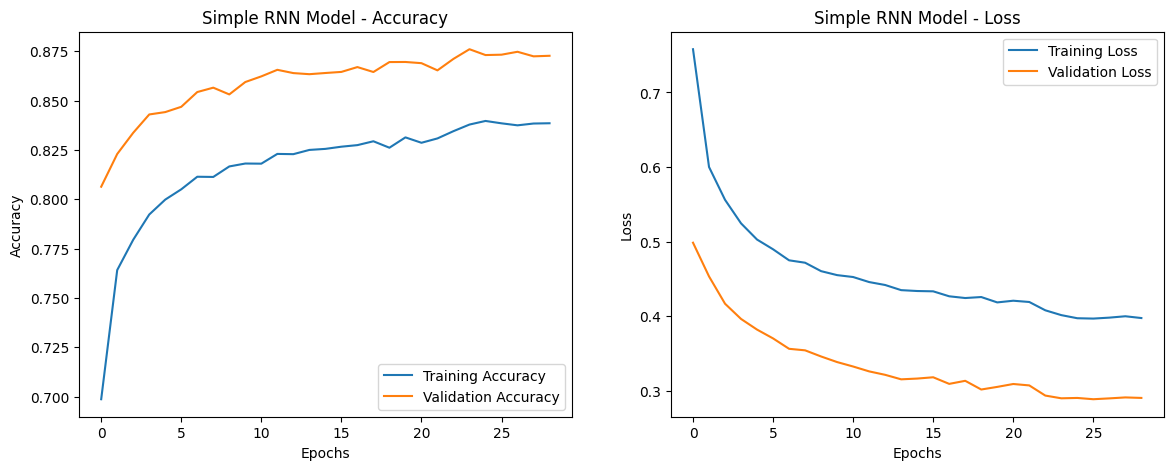

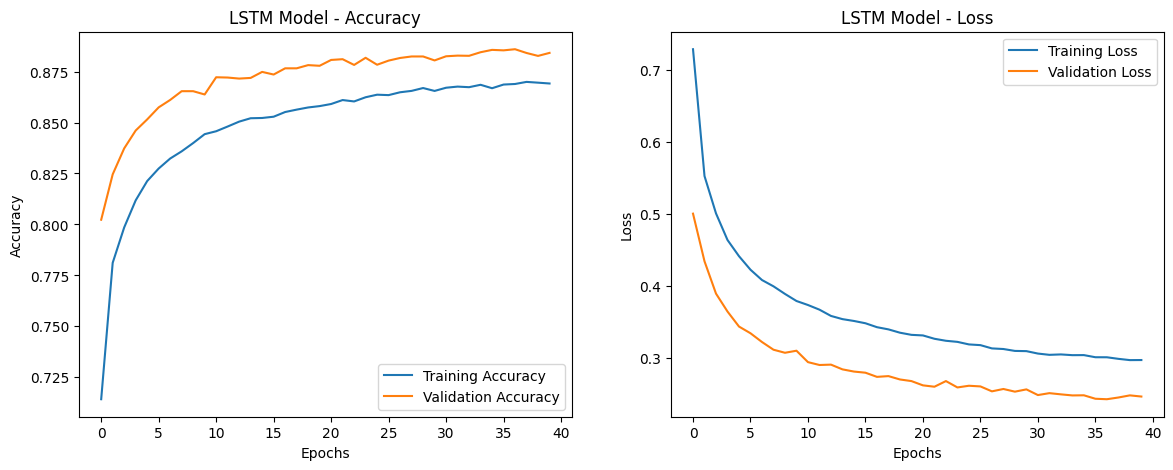

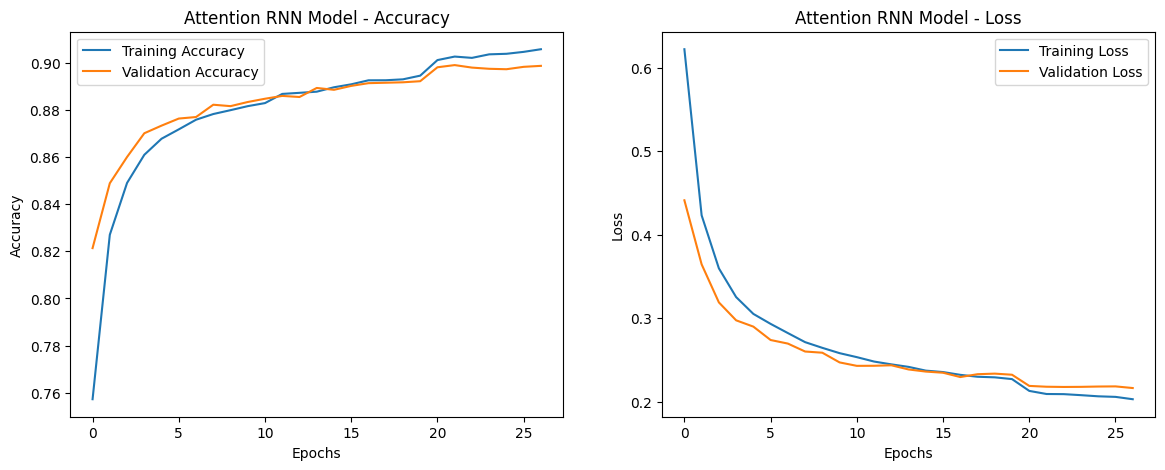

677/677 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Classification Report for Simple RNN Model
              precision    recall  f1-score   support

       angry       0.91      0.99      0.95      4331
    surprise       0.88      0.98      0.93      4371
         sad       0.77      0.81      0.79      4375
       happy       0.89      0.64      0.75      4320
        fear       0.93      0.95      0.94      4264

    accuracy                           0.88     21661
   macro avg       0.88      0.88      0.87     21661
weighted avg       0.88      0.88      0.87     21661



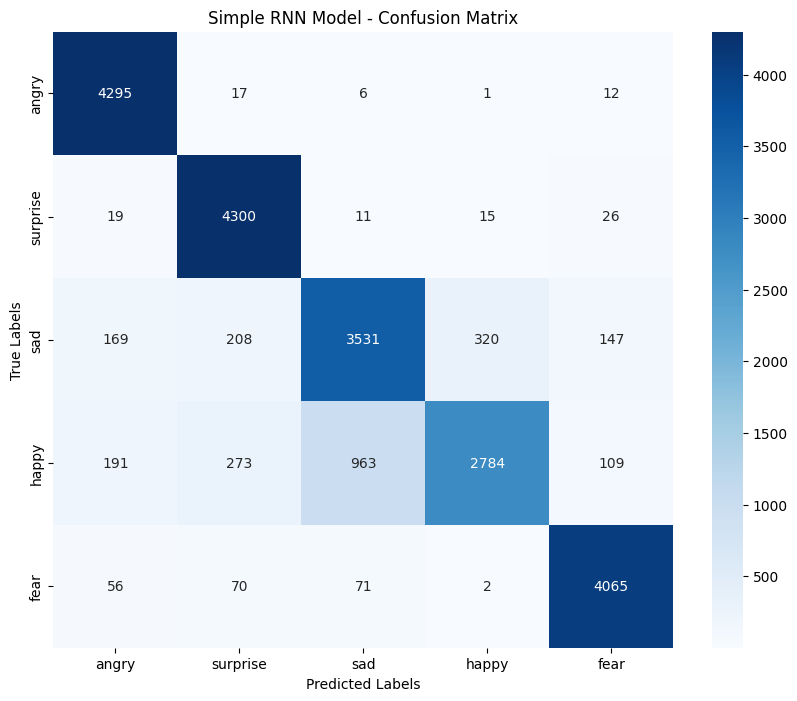

677/677 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Classification Report for LSTM Model
              precision    recall  f1-score   support

       angry       0.92      0.99      0.95      4331
    surprise       0.91      0.99      0.95      4371
         sad       0.76      0.84      0.80      4375
       happy       0.90      0.66      0.76      4320
        fear       0.95      0.96      0.95      4264

    accuracy                           0.89     21661
   macro avg       0.89      0.89      0.88     21661
weighted avg       0.89      0.89      0.88     21661



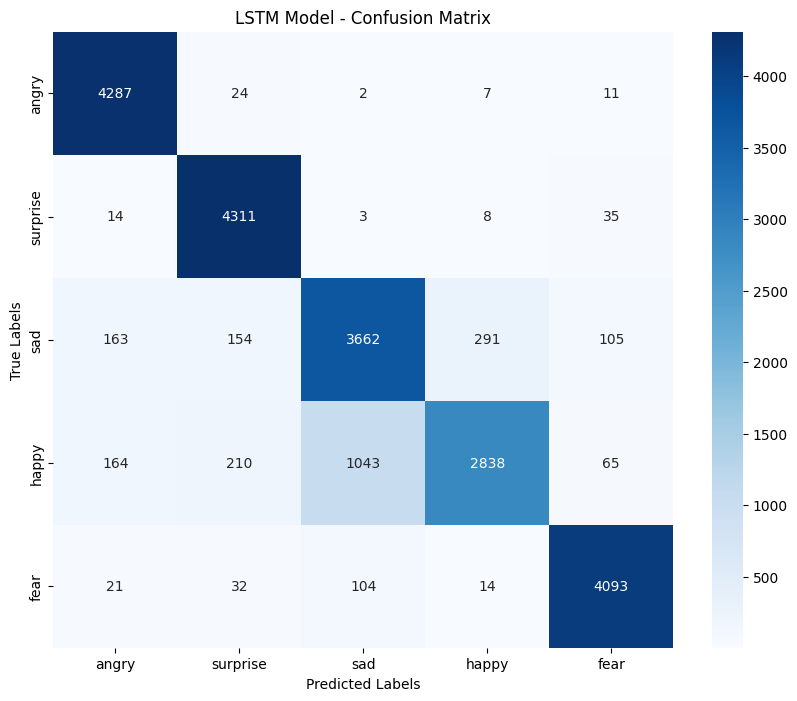

  1/677 ━━━━━━━━━━━━━━━━━━━━ 2:31 223ms/step

/usr/local/lib/python3.12/dist-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


677/677 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(



Classification Report for Attention RNN Model
              precision    recall  f1-score   support

       angry       0.93      0.99      0.96      4331
    surprise       0.93      0.98      0.96      4371
         sad       0.82      0.79      0.80      4375
       happy       0.85      0.76      0.80      4320
        fear       0.95      0.98      0.96      4264

    accuracy                           0.90     21661
   macro avg       0.90      0.90      0.90     21661
weighted avg       0.90      0.90      0.90     21661



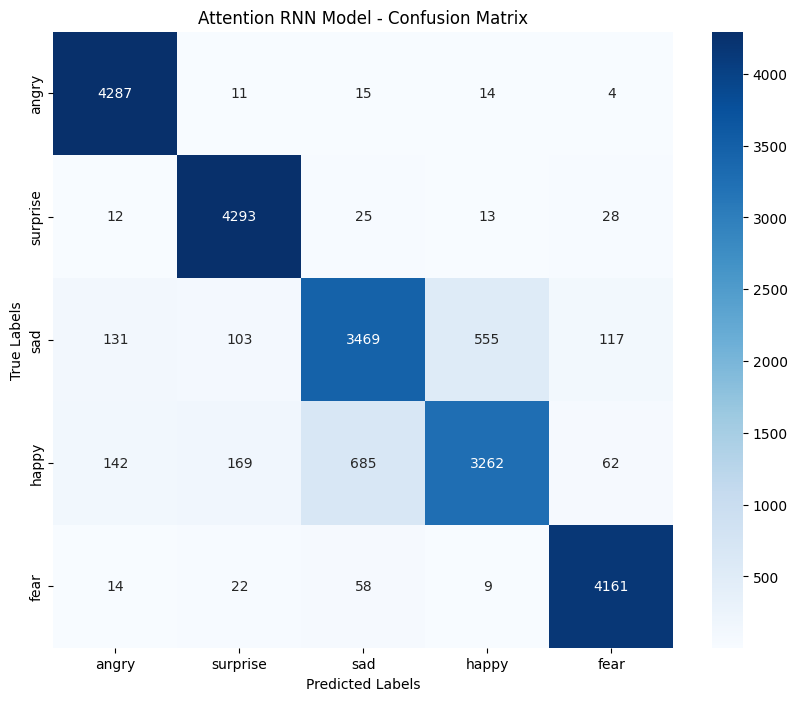

677/677 ━━━━━━━━━━━━━━━━━━━━ 1s 942us/step
677/677 ━━━━━━━━━━━━━━━━━━━━ 1s 999us/step
677/677 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


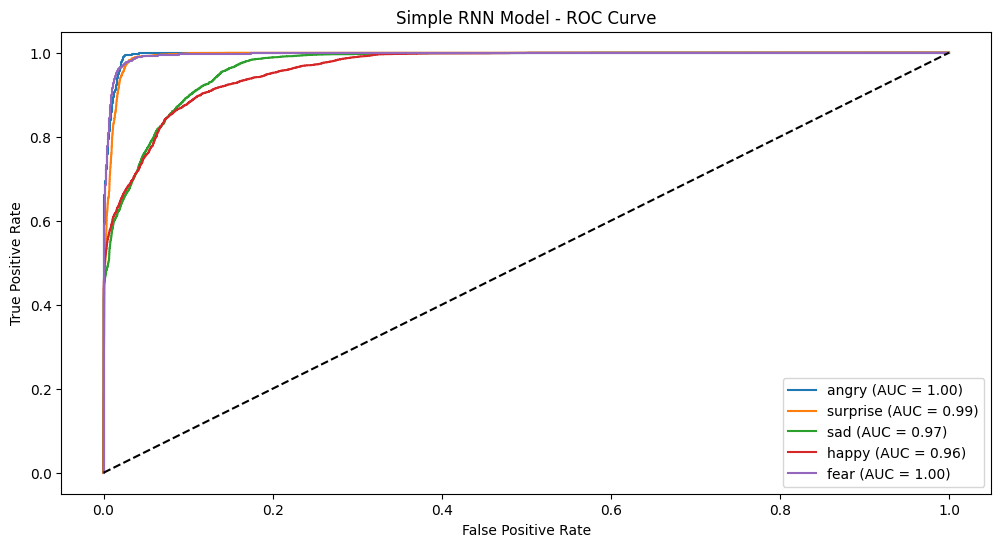

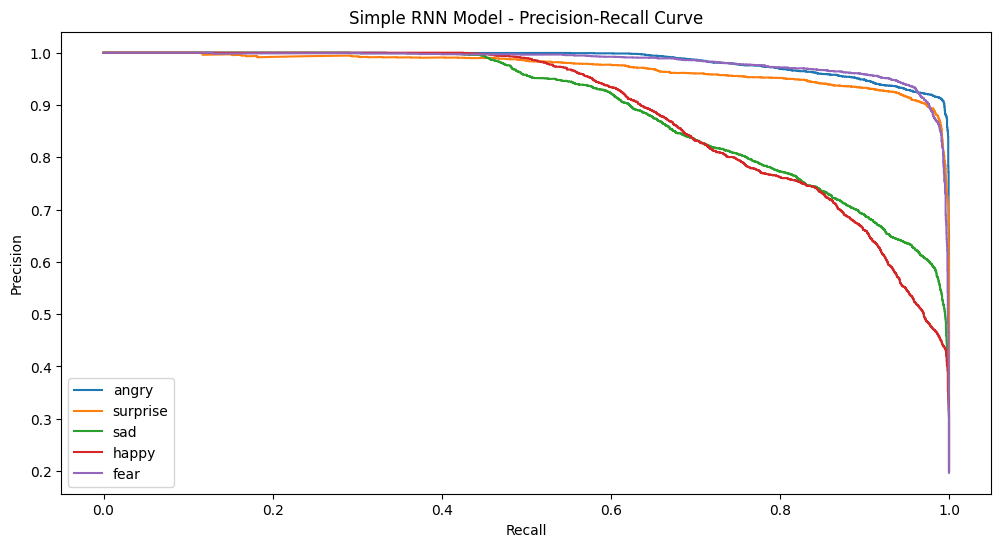

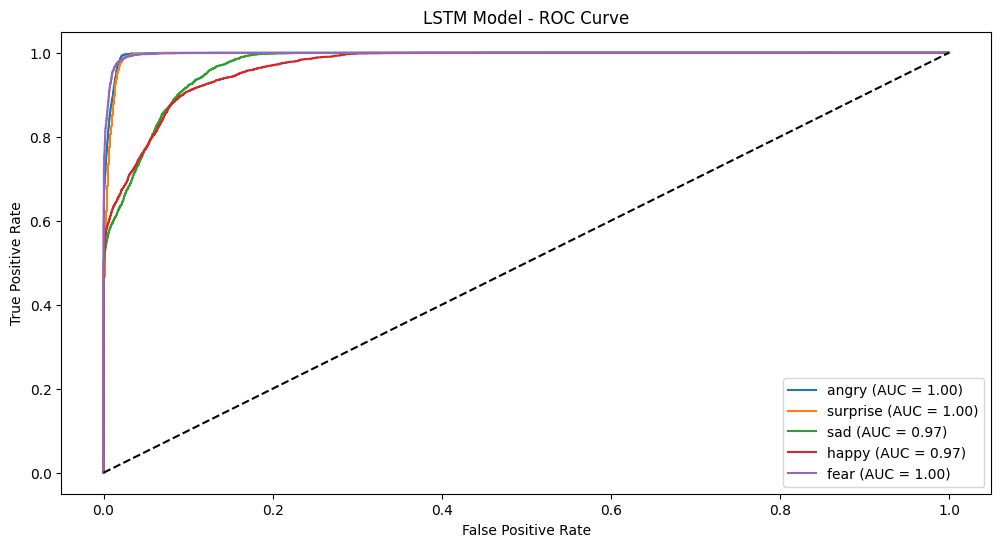

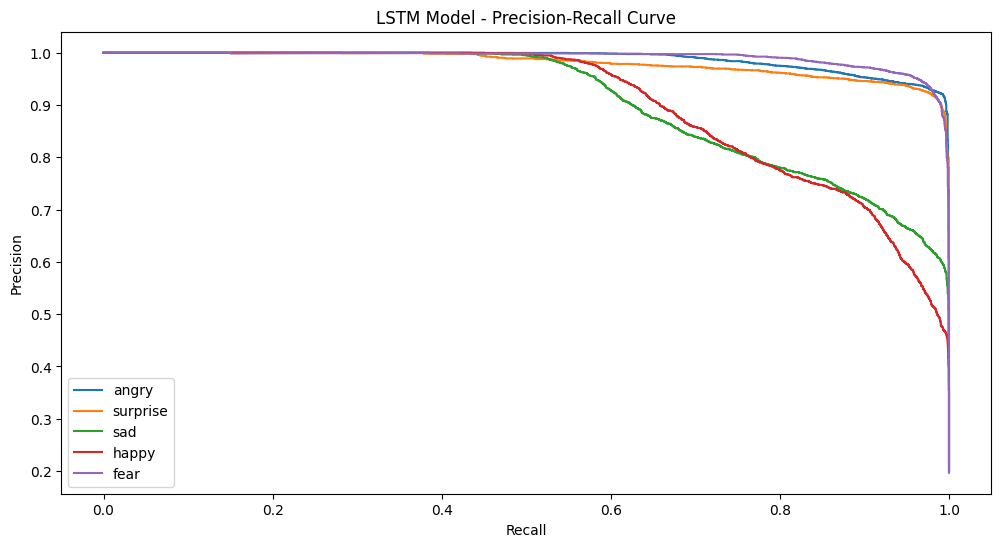

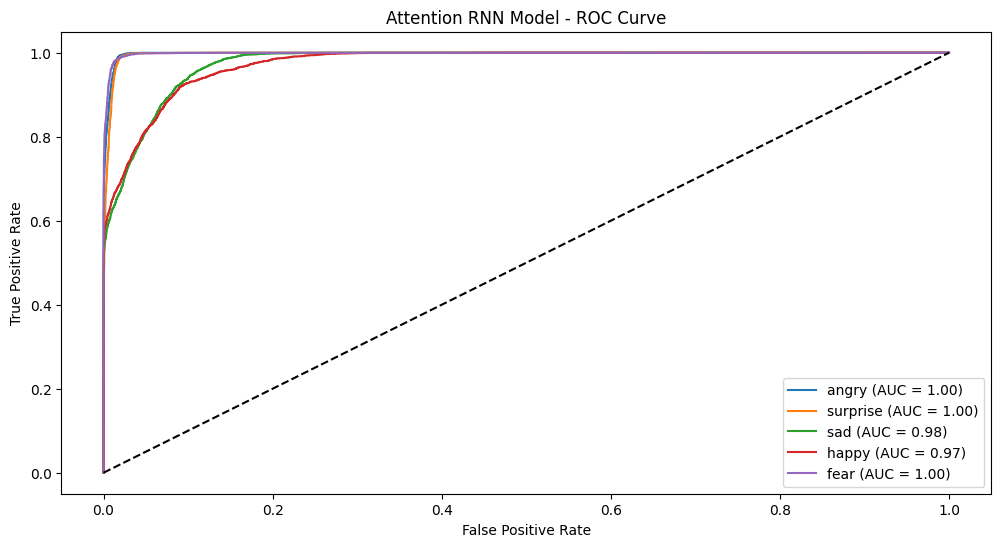

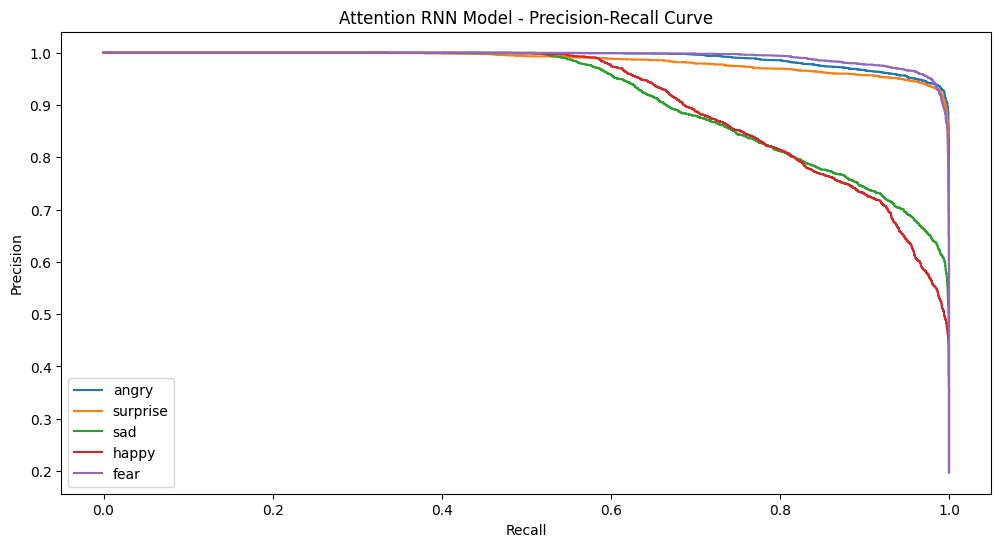


=== Model Performance Comparison ===
Simple RNN: 87.60%
LSTM: 88.60%
Attention RNN: 89.89%


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    SimpleRNN, LSTM, Dense, Dropout, Flatten,
    Input, Multiply, Activation, RepeatVector, Permute
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load Music Data
music_data_path = "/content/music_moods_dataset.csv"
music_data = pd.read_csv(music_data_path)

# ---------------------------- Configurations ---------------------------- #
BATCH_SIZE = 32
EPOCHS = 40

# ---------------------------- Selected Classes ---------------------------- #
SELECTED_MOODS = ['angry', 'surprise', 'sad', 'happy', 'fear']
SELECTED_CLASSES = ['angry', 'surprise', 'sad', 'happy', 'fear']

# ---------------------------- Music Data Preprocessing ---------------------------- #
def preprocess_music_data(music_data, selected_features, selected_moods):
    music_data = music_data[music_data['mood'].isin(selected_moods)]

    X_music = music_data[selected_features]
    y_music = music_data['mood']

    scaler = StandardScaler()
    X_music_scaled = scaler.fit_transform(X_music)

    encoder = OneHotEncoder(sparse_output=False)
    y_music_encoded = encoder.fit_transform(y_music.values.reshape(-1, 1))

    # Apply SMOTE to balance the dataset
    smote = SMOTE(random_state=42)
    X_music_balanced, y_music_balanced = smote.fit_resample(X_music_scaled, y_music_encoded)

    music_train_features, music_val_features, music_train_labels, music_val_labels = train_test_split(
        X_music_balanced, y_music_balanced, test_size=0.2, random_state=42
    )

    # Reshape for RNN compatibility (samples, timesteps, features)
    music_train_features = music_train_features.reshape(-1, 1, len(selected_features))
    music_val_features = music_val_features.reshape(-1, 1, len(selected_features))

    return music_train_features, music_val_features, music_train_labels, music_val_labels

# ---------------------------- Simple RNN Model ---------------------------- #
def create_simple_rnn_model(input_shape, num_classes):
    """Build a simple RNN model."""
    model = Sequential([
        SimpleRNN(64, return_sequences=True, input_shape=input_shape),
        Dropout(0.3),
        SimpleRNN(32),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# ---------------------------- LSTM Model ---------------------------- #
def create_lstm_model(input_shape, num_classes):
    """Build an LSTM model."""
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape),
        Dropout(0.3),
        LSTM(32),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.3),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# ---------------------------- Attention-Based RNN for Music ---------------------------- #
def build_attention_rnn(input_shape, num_classes):
    """Build an Attention-Based RNN model."""
    inputs = Input(shape=input_shape)
    x = LSTM(64, return_sequences=True)(inputs)

    # Attention mechanism
    attention = Dense(1, activation='tanh')(x)
    attention = Flatten()(attention)
    attention = Activation('softmax')(attention)
    attention = RepeatVector(64)(attention)
    attention = Permute([2, 1])(attention)

    multiplied = Multiply()([x, attention])
    x = LSTM(32)(multiplied)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# ---------------------------- Training and Evaluation ---------------------------- #
def train_and_evaluate_model(model, train_features, train_labels, val_features, val_labels):
    """Train and evaluate a model."""
    callbacks = [
        EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)
    ]

    history = model.fit(
        train_features, train_labels,
        validation_data=(val_features, val_labels),
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        callbacks=callbacks
    )

    score = model.evaluate(val_features, val_labels)
    print(f"Model Test Accuracy: {score[1] * 100:.2f}%")
    return history

# ---------------------------- Plotting Utilities ---------------------------- #
def plot_training_history(history, title):
    plt.figure(figsize=(14, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

def plot_confusion_matrix_and_report(model, features, labels, selected_classes, title):
    """Plot confusion matrix and classification report for a model."""
    predictions = model.predict(features)
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(labels, axis=1)

    # Classification Report
    print(f"\nClassification Report for {title}")
    print(classification_report(true_labels, predicted_labels, target_names=selected_classes))

    # Confusion Matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=selected_classes, yticklabels=selected_classes)
    plt.title(f"{title} - Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

def plot_roc_pr_curves(y_true, y_probs, selected_classes, model_name):
    """Plot ROC and Precision-Recall curves."""
    num_classes = y_true.shape[1]

    # ROC Curve
    plt.figure(figsize=(12, 6))
    for i, class_name in enumerate(selected_classes):
        fpr, tpr, _ = roc_curve(y_true[:, i], y_probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.title(f"{model_name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="best")
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(12, 6))
    for i, class_name in enumerate(selected_classes):
        precision, recall, _ = precision_recall_curve(y_true[:, i], y_probs[:, i])
        plt.plot(recall, precision, label=f'{class_name}')
    plt.title(f"{model_name} - Precision-Recall Curve")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.legend(loc="best")
    plt.show()

# ---------------------------- Execution Example ---------------------------- #
selected_features = [
    'danceability', 'energy', 'valence', 'tempo', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'loudness'
]

# Data Preparation
music_train_features, music_val_features, music_train_labels, music_val_labels = preprocess_music_data(
    music_data, selected_features, SELECTED_MOODS
)

# Add these print statements before training each model:
print("\n" + "="*50)
print("TRAINING SIMPLE RNN MODEL")
print("="*50)
simple_rnn_model = create_simple_rnn_model((1, len(selected_features)), len(SELECTED_CLASSES))
simple_rnn_history = train_and_evaluate_model(simple_rnn_model, music_train_features, music_train_labels, music_val_features, music_val_labels)

print("\n" + "="*50)
print("TRAINING LSTM MODEL")
print("="*50)
lstm_model = create_lstm_model((1, len(selected_features)), len(SELECTED_CLASSES))
lstm_history = train_and_evaluate_model(lstm_model, music_train_features, music_train_labels, music_val_features, music_val_labels)

print("\n" + "="*50)
print("TRAINING ATTENTION RNN MODEL")
print("="*50)
attention_rnn_model = build_attention_rnn((1, len(selected_features)), len(SELECTED_CLASSES))
attention_rnn_history = train_and_evaluate_model(attention_rnn_model, music_train_features, music_train_labels, music_val_features, music_val_labels)

# Plot Training Histories
plot_training_history(simple_rnn_history, "Simple RNN Model")
plot_training_history(lstm_history, "LSTM Model")
plot_training_history(attention_rnn_history, "Attention RNN Model")

# Evaluate Models with Confusion Matrix and Classification Report
plot_confusion_matrix_and_report(simple_rnn_model, music_val_features, music_val_labels, SELECTED_CLASSES, "Simple RNN Model")
plot_confusion_matrix_and_report(lstm_model, music_val_features, music_val_labels, SELECTED_CLASSES, "LSTM Model")
plot_confusion_matrix_and_report(attention_rnn_model, music_val_features, music_val_labels, SELECTED_CLASSES, "Attention RNN Model")

# ROC and Precision-Recall Curves
simple_rnn_probs = simple_rnn_model.predict(music_val_features)
lstm_probs = lstm_model.predict(music_val_features)
attention_rnn_probs = attention_rnn_model.predict(music_val_features)

plot_roc_pr_curves(music_val_labels, simple_rnn_probs, SELECTED_CLASSES, "Simple RNN Model")
plot_roc_pr_curves(music_val_labels, lstm_probs, SELECTED_CLASSES, "LSTM Model")
plot_roc_pr_curves(music_val_labels, attention_rnn_probs, SELECTED_CLASSES, "Attention RNN Model")

# Model Comparison
print("\n=== Model Performance Comparison ===")
models = {
    "Simple RNN": simple_rnn_model,
    "LSTM": lstm_model,
    "Attention RNN": attention_rnn_model
}

for name, model in models.items():
    score = model.evaluate(music_val_features, music_val_labels, verbose=0)
    print(f"{name}: {score[1] * 100:.2f}%")

Preprocessing music data...
Training features shape: (86644, 1, 9)
Validation features shape: (21661, 1, 9)
Training labels shape: (86644, 5)
Validation labels shape: (21661, 5)

TRAINING SIMPLE RNN MODEL

Training Simple RNN...
Epoch 1/40


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2708/2708 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7004 - loss: 0.7438 - val_accuracy: 0.8225 - val_loss: 0.4524 - learning_rate: 0.0010
Epoch 2/40
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8010 - loss: 0.4908 - val_accuracy: 0.8427 - val_loss: 0.3908 - learning_rate: 0.0010
Epoch 3/40
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8195 - loss: 0.4391 - val_accuracy: 0.8564 - val_loss: 0.3430 - learning_rate: 0.0010
Epoch 4/40
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8322 - loss: 0.4021 - val_accuracy: 0.8450 - val_loss: 0.3659 - learning_rate: 0.0010
Epoch 5/40
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8372 - loss: 0.3838 - val_accuracy: 0.8601 - val_loss: 0.3346 - learning_rate: 0.0010
Epoch 6/40
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8441 - loss: 0.3700 - val_accuracy: 0.8689 - val_loss: 0.3109 - learning_rate: 0.0010
Epoch 7/40
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.8485 - loss: 0.356

/usr/local/lib/python3.12/dist-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


2708/2708 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.6885 - loss: 0.8047 - val_accuracy: 0.8263 - val_loss: 0.4402 - learning_rate: 0.0010
Epoch 2/40
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8191 - loss: 0.4499 - val_accuracy: 0.8483 - val_loss: 0.3716 - learning_rate: 0.0010
Epoch 3/40
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8427 - loss: 0.3810 - val_accuracy: 0.8620 - val_loss: 0.3222 - learning_rate: 0.0010
Epoch 4/40
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8598 - loss: 0.3353 - val_accuracy: 0.8654 - val_loss: 0.3097 - learning_rate: 0.0010
Epoch 5/40
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8656 - loss: 0.3109 - val_accuracy: 0.8754 - val_loss: 0.2824 - learning_rate: 0.0010
Epoch 6/40
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8719 - loss: 0.2912 - val_accuracy: 0.8761 - val_loss: 0.2700 - learning_rate: 0.0010
Epoch 7/40
2708/2708 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8748 - loss: 0.2

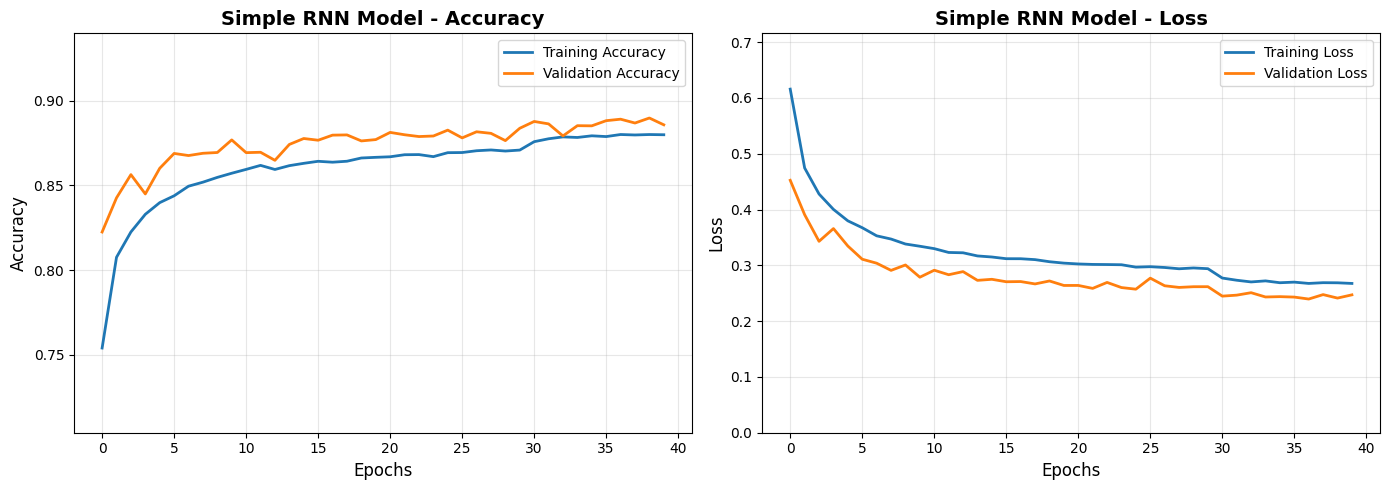

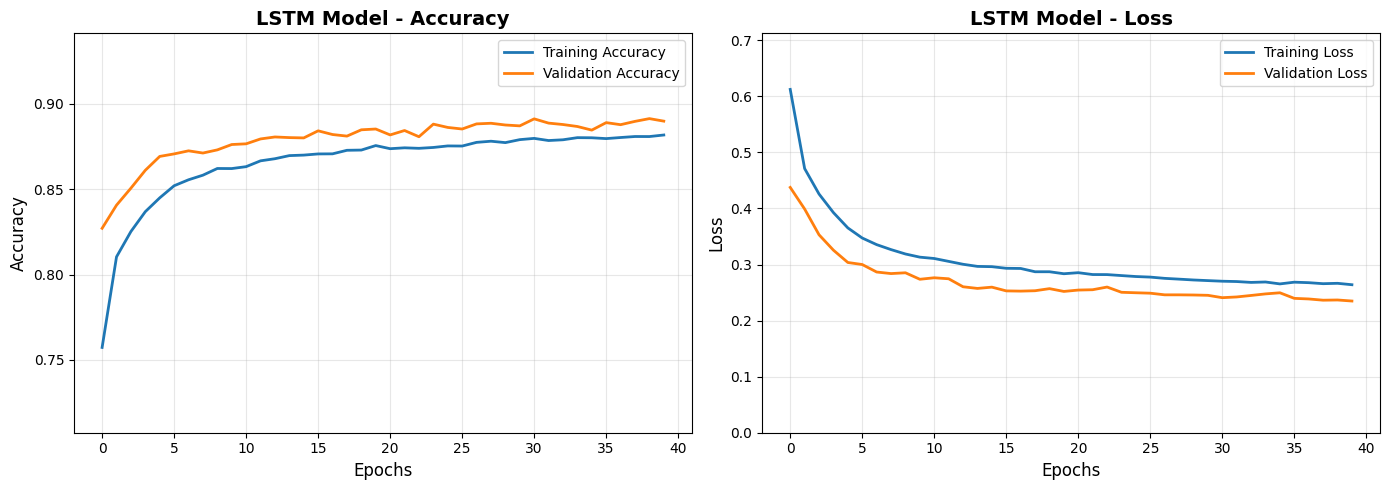

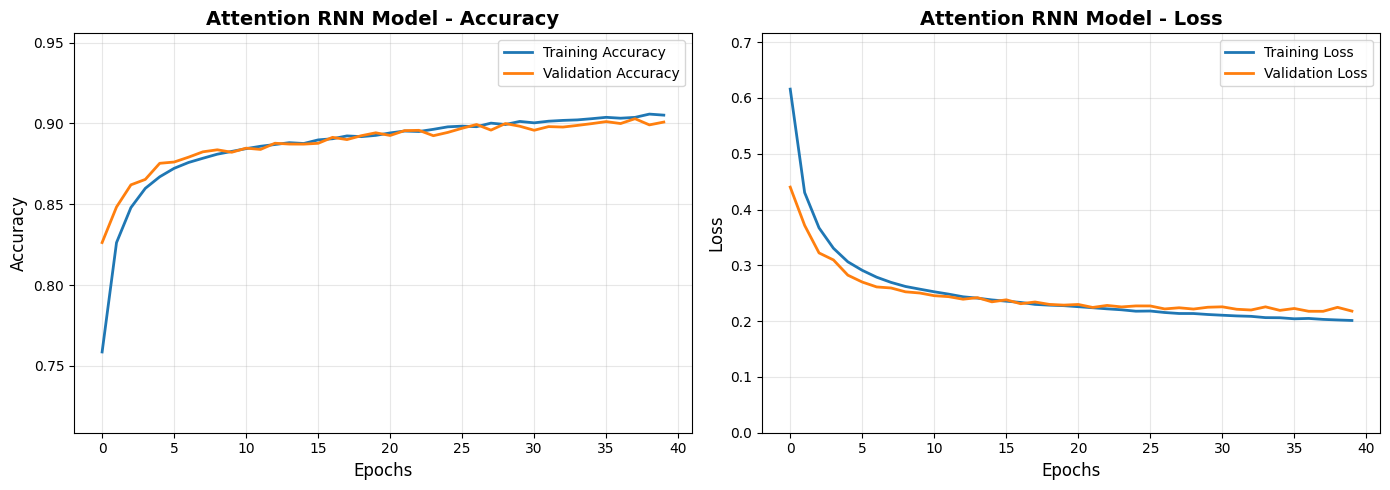

677/677 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Classification Report for Simple RNN Model
              precision    recall  f1-score   support

       angry       0.93      0.98      0.95      4331
    surprise       0.92      0.98      0.95      4371
         sad       0.77      0.84      0.81      4375
       happy       0.89      0.67      0.76      4320
        fear       0.94      0.98      0.96      4264

    accuracy                           0.89     21661
   macro avg       0.89      0.89      0.89     21661
weighted avg       0.89      0.89      0.89     21661



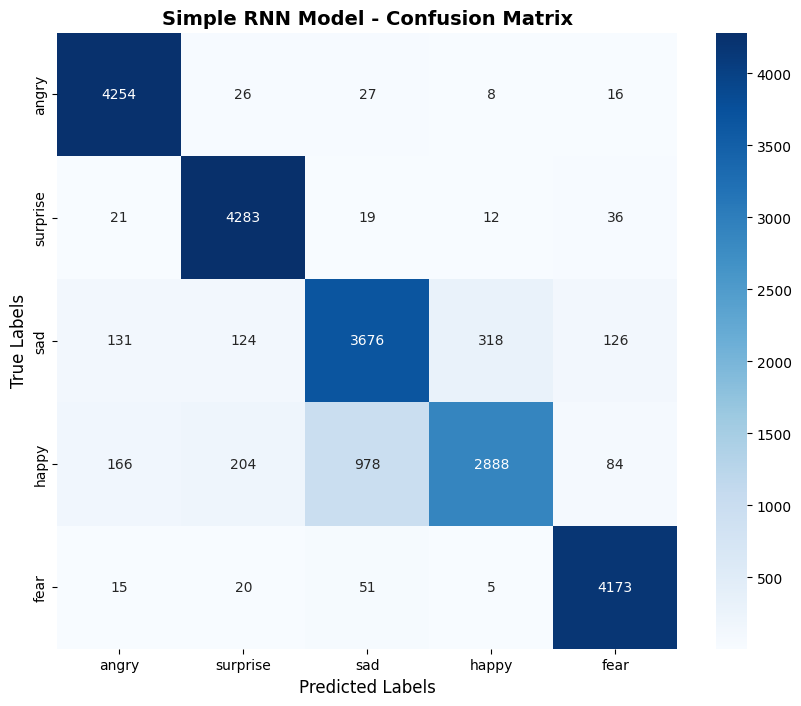

677/677 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Classification Report for LSTM Model
              precision    recall  f1-score   support

       angry       0.93      0.98      0.95      4331
    surprise       0.92      0.98      0.95      4371
         sad       0.80      0.80      0.80      4375
       happy       0.86      0.72      0.79      4320
        fear       0.94      0.97      0.95      4264

    accuracy                           0.89     21661
   macro avg       0.89      0.89      0.89     21661
weighted avg       0.89      0.89      0.89     21661



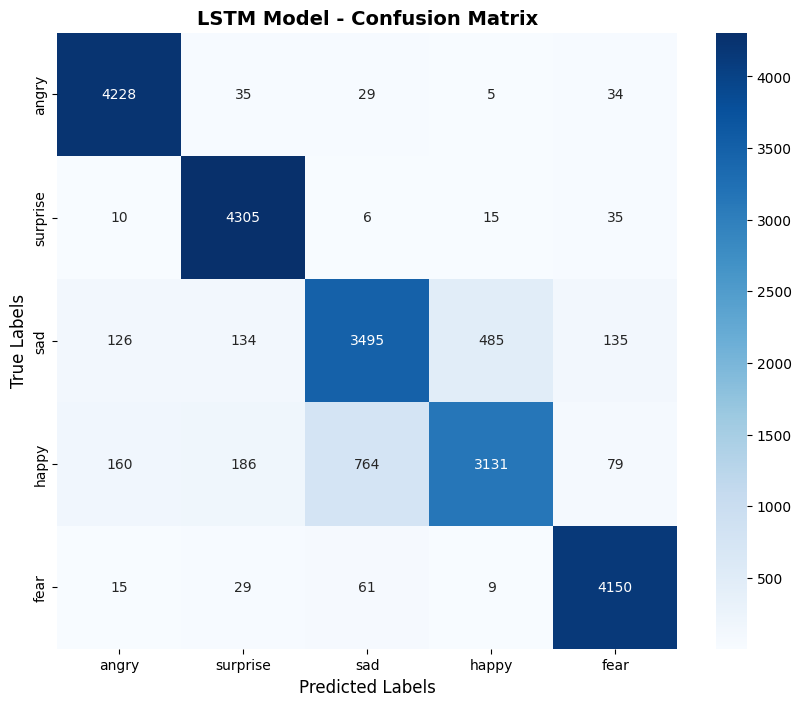

 55/677 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step  

/usr/local/lib/python3.12/dist-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


677/677 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/ops/nn.py:944: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(



Classification Report for Attention RNN Model
              precision    recall  f1-score   support

       angry       0.94      0.98      0.96      4331
    surprise       0.94      0.98      0.96      4371
         sad       0.82      0.81      0.82      4375
       happy       0.85      0.77      0.81      4320
        fear       0.95      0.98      0.96      4264

    accuracy                           0.90     21661
   macro avg       0.90      0.90      0.90     21661
weighted avg       0.90      0.90      0.90     21661



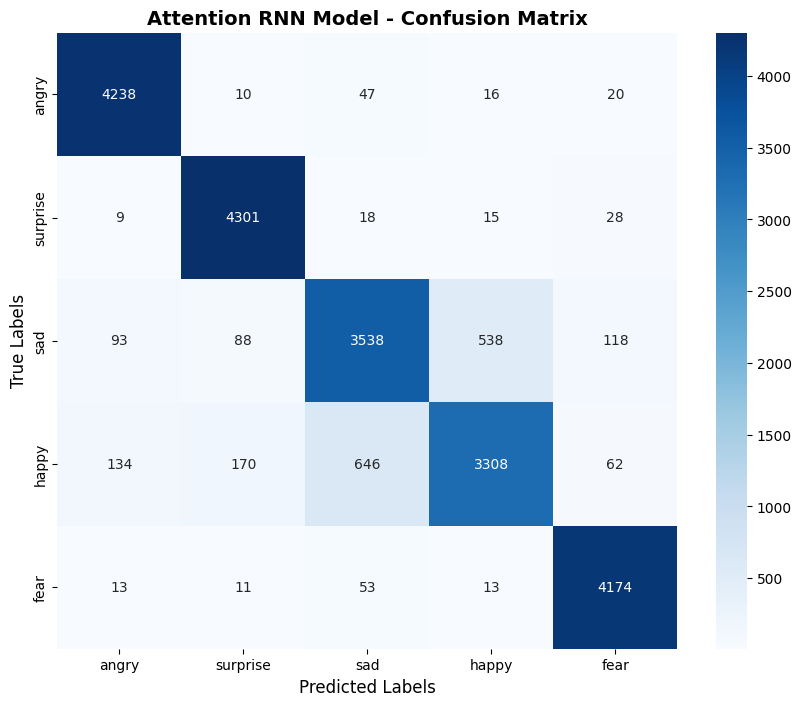


Generating ROC and Precision-Recall curves...
677/677 ━━━━━━━━━━━━━━━━━━━━ 1s 926us/step
677/677 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
677/677 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


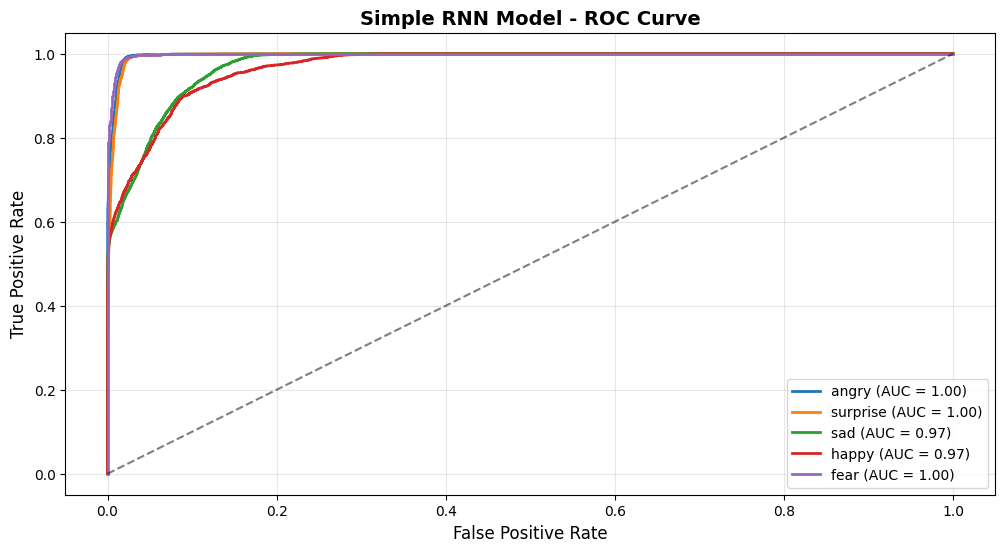

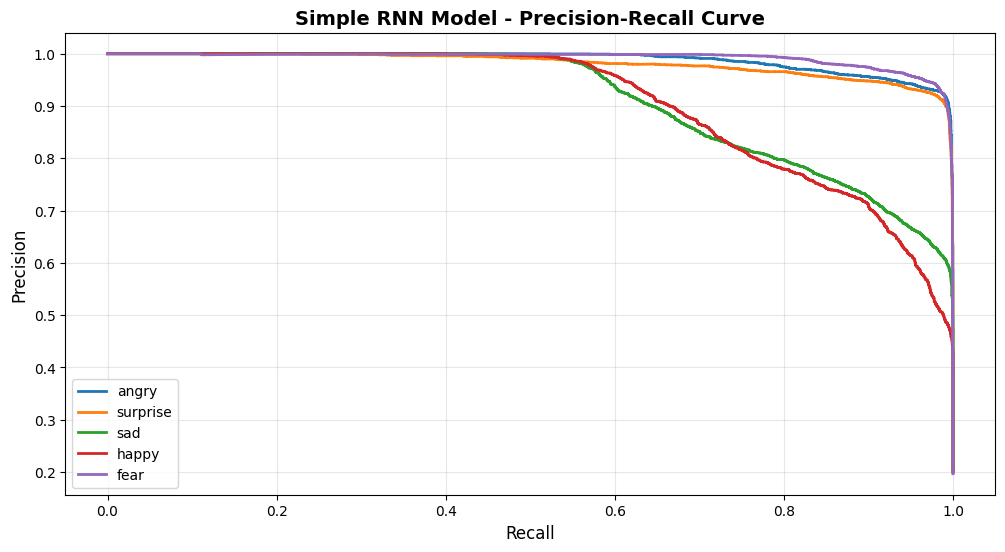

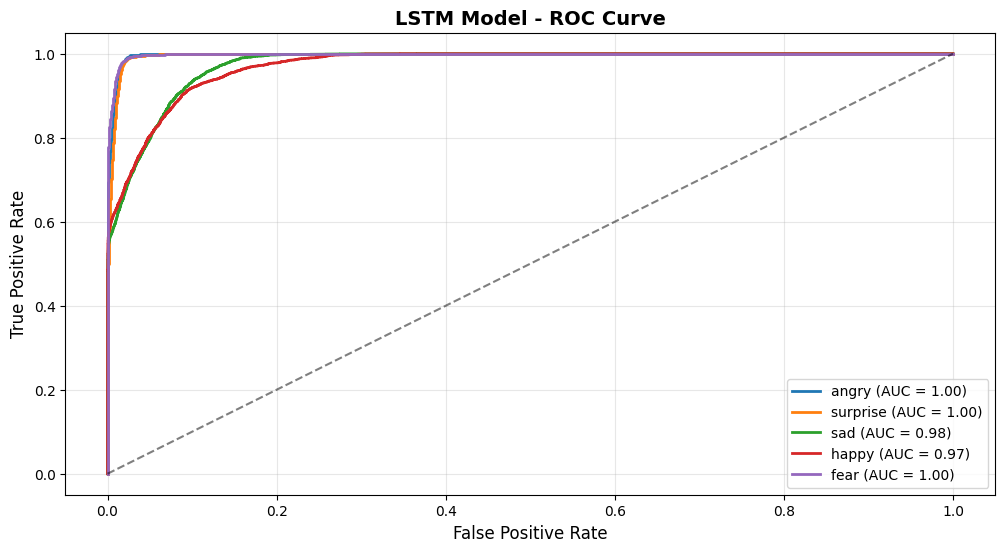

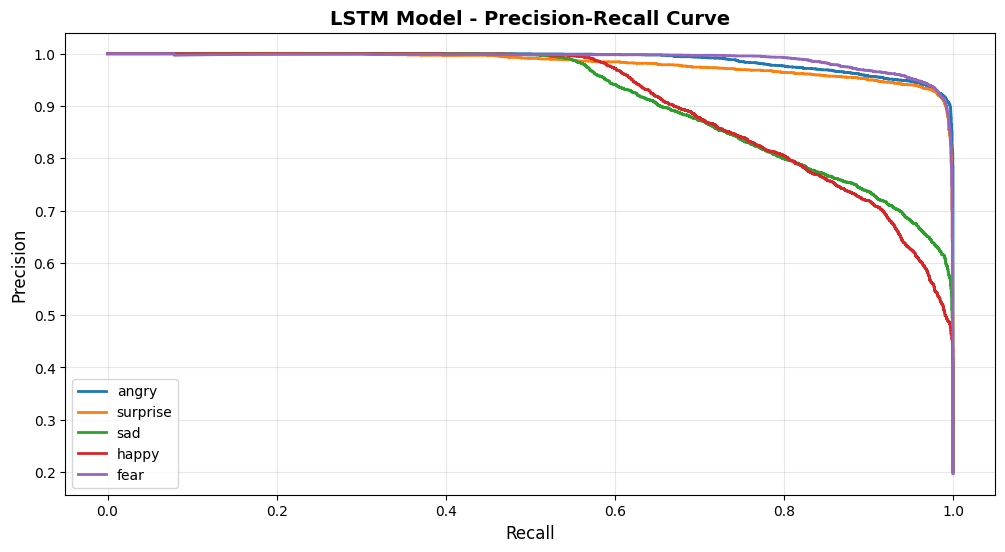

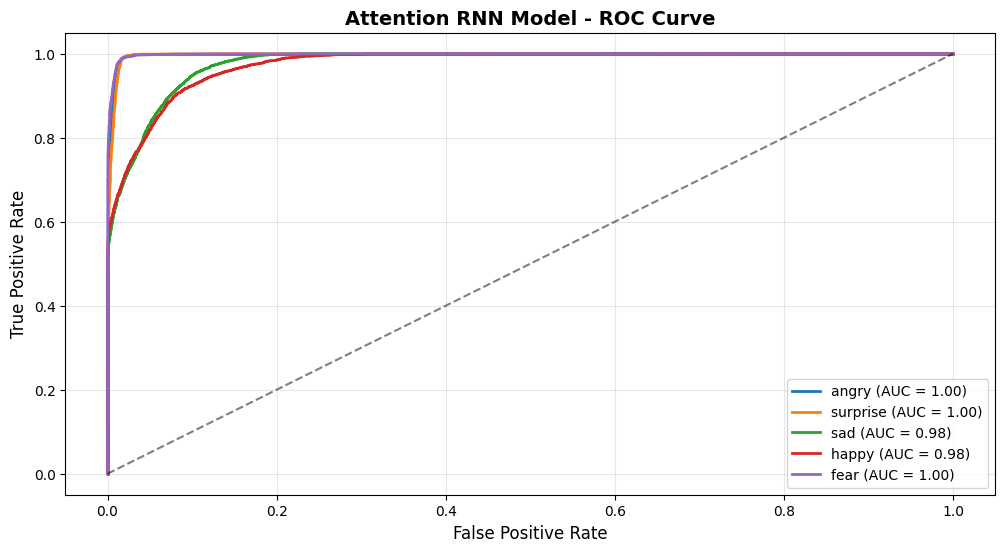

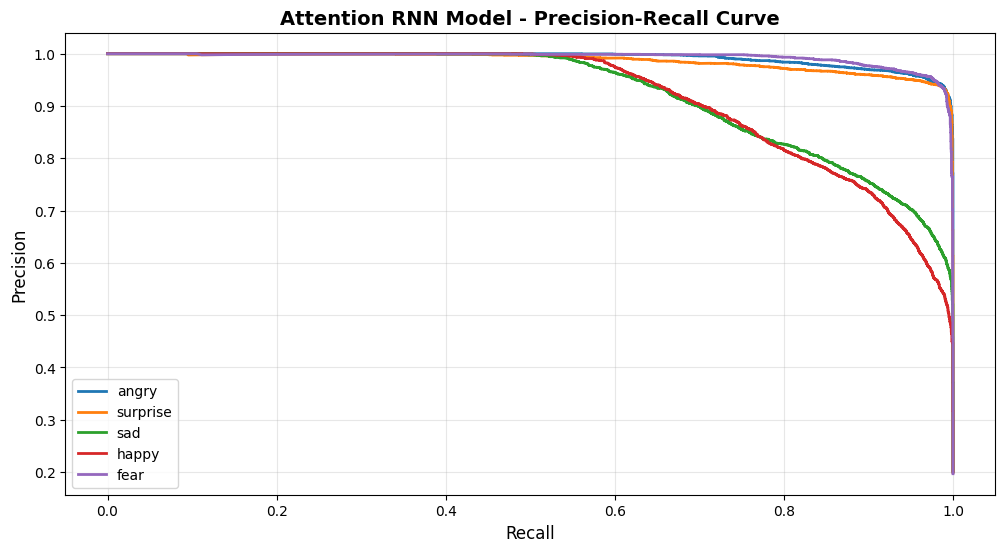


FINAL MODEL PERFORMANCE COMPARISON
Simple RNN: 88.98%
LSTM: 89.14%
Attention RNN: 90.30%



Best model: Attention RNN
Best model saved as 'best_music_mood_model.h5'


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    SimpleRNN, LSTM, Dense, Dropout, Flatten,
    Input, Multiply, Activation, RepeatVector, Permute, Attention,
    BatchNormalization
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Load Music Data
music_data_path = "/content/music_moods_dataset.csv"
music_data = pd.read_csv(music_data_path)

# ---------------------------- Configurations ---------------------------- #
BATCH_SIZE = 32
EPOCHS = 40

# ---------------------------- Selected Classes ---------------------------- #
SELECTED_MOODS = ['angry', 'surprise', 'sad', 'happy', 'fear']
SELECTED_CLASSES = ['angry', 'surprise', 'sad', 'happy', 'fear']

# ---------------------------- Music Data Preprocessing ---------------------------- #
def preprocess_music_data(music_data, selected_features, selected_moods):
    music_data = music_data[music_data['mood'].isin(selected_moods)]

    X_music = music_data[selected_features]
    y_music = music_data['mood']

    scaler = StandardScaler()
    X_music_scaled = scaler.fit_transform(X_music)

    encoder = OneHotEncoder(sparse_output=False)
    y_music_encoded = encoder.fit_transform(y_music.values.reshape(-1, 1))

    # Apply SMOTE to balance the dataset
    smote = SMOTE(random_state=42)
    X_music_balanced, y_music_balanced = smote.fit_resample(X_music_scaled, y_music_encoded)

    music_train_features, music_val_features, music_train_labels, music_val_labels = train_test_split(
        X_music_balanced, y_music_balanced, test_size=0.2, random_state=42
    )

    # Reshape for RNN compatibility (samples, timesteps, features)
    music_train_features = music_train_features.reshape(-1, 1, len(selected_features))
    music_val_features = music_val_features.reshape(-1, 1, len(selected_features))

    return music_train_features, music_val_features, music_train_labels, music_val_labels

# ---------------------------- Improved Simple RNN Model ---------------------------- #
def create_simple_rnn_model(input_shape, num_classes):
    """Build a simple but effective RNN model."""
    model = Sequential([
        SimpleRNN(128, return_sequences=False, input_shape=input_shape),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# ---------------------------- Improved LSTM Model ---------------------------- #
def create_lstm_model(input_shape, num_classes):
    """Build an effective LSTM model."""
    model = Sequential([
        LSTM(128, return_sequences=False, input_shape=input_shape),
        Dropout(0.3),
        Dense(64, activation='relu'),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# ---------------------------- Attention-Based RNN for Music ---------------------------- #
def build_attention_rnn(input_shape, num_classes):
    """Build an Attention-Based RNN model."""
    inputs = Input(shape=input_shape)
    x = LSTM(64, return_sequences=True)(inputs)
    x = Attention()([x, x])
    x = LSTM(32)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    model.compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
    return model

# ---------------------------- Training and Evaluation ---------------------------- #
def train_and_evaluate_model(model, train_features, train_labels, val_features, val_labels, model_name):
    """Train and evaluate a model."""
    callbacks = [
        EarlyStopping(monitor='val_accuracy', patience=8, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)
    ]

    print(f"\nTraining {model_name}...")
    history = model.fit(
        train_features, train_labels,
        validation_data=(val_features, val_labels),
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        callbacks=callbacks,
        verbose=1
    )

    score = model.evaluate(val_features, val_labels, verbose=0)
    print(f"{model_name} Test Accuracy: {score[1] * 100:.2f}%")
    return history

# ---------------------------- Plotting Utilities ---------------------------- #
def plot_training_history(history, title):
    plt.figure(figsize=(14, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    plt.title(f'{title} - Accuracy', fontsize=14, fontweight='bold')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Accuracy', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Set y-axis limits for better visualization
    min_acc = min(min(history.history['accuracy']), min(history.history['val_accuracy']))
    max_acc = max(max(history.history['accuracy']), max(history.history['val_accuracy']))
    plt.ylim(max(0, min_acc - 0.05), min(1.0, max_acc + 0.05))

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
    plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    plt.title(f'{title} - Loss', fontsize=14, fontweight='bold')
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Set y-axis limits for better visualization
    min_loss = min(min(history.history['loss']), min(history.history['val_loss']))
    max_loss = max(max(history.history['loss']), max(history.history['val_loss']))
    plt.ylim(0, min(2.0, max_loss + 0.1))

    plt.tight_layout()
    plt.show()

def plot_confusion_matrix_and_report(model, features, labels, selected_classes, title):
    """Plot confusion matrix and classification report for a model."""
    predictions = model.predict(features)
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(labels, axis=1)

    # Classification Report
    print(f"\nClassification Report for {title}")
    print(classification_report(true_labels, predicted_labels, target_names=selected_classes))

    # Confusion Matrix
    cm = confusion_matrix(true_labels, predicted_labels)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=selected_classes, yticklabels=selected_classes)
    plt.title(f"{title} - Confusion Matrix", fontsize=14, fontweight='bold')
    plt.xlabel("Predicted Labels", fontsize=12)
    plt.ylabel("True Labels", fontsize=12)
    plt.show()

def plot_roc_pr_curves(y_true, y_probs, selected_classes, model_name):
    """Plot ROC and Precision-Recall curves."""
    num_classes = y_true.shape[1]

    # ROC Curve
    plt.figure(figsize=(12, 6))
    for i, class_name in enumerate(selected_classes):
        fpr, tpr, _ = roc_curve(y_true[:, i], y_probs[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{class_name} (AUC = {roc_auc:.2f})', linewidth=2)
    plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
    plt.title(f"{model_name} - ROC Curve", fontsize=14, fontweight='bold')
    plt.xlabel("False Positive Rate", fontsize=12)
    plt.ylabel("True Positive Rate", fontsize=12)
    plt.legend(loc="best")
    plt.grid(True, alpha=0.3)
    plt.show()

    # Precision-Recall Curve
    plt.figure(figsize=(12, 6))
    for i, class_name in enumerate(selected_classes):
        precision, recall, _ = precision_recall_curve(y_true[:, i], y_probs[:, i])
        plt.plot(recall, precision, label=f'{class_name}', linewidth=2)
    plt.title(f"{model_name} - Precision-Recall Curve", fontsize=14, fontweight='bold')
    plt.xlabel("Recall", fontsize=12)
    plt.ylabel("Precision", fontsize=12)
    plt.legend(loc="best")
    plt.grid(True, alpha=0.3)
    plt.show()

# ---------------------------- Execution Example ---------------------------- #
selected_features = [
    'danceability', 'energy', 'valence', 'tempo', 'speechiness', 'acousticness',
    'instrumentalness', 'liveness', 'loudness'
]

# Data Preparation
print("Preprocessing music data...")
music_train_features, music_val_features, music_train_labels, music_val_labels = preprocess_music_data(
    music_data, selected_features, SELECTED_MOODS
)

print(f"Training features shape: {music_train_features.shape}")
print(f"Validation features shape: {music_val_features.shape}")
print(f"Training labels shape: {music_train_labels.shape}")
print(f"Validation labels shape: {music_val_labels.shape}")

# Simple RNN Model
print("\n" + "="*60)
print("TRAINING SIMPLE RNN MODEL")
print("="*60)
simple_rnn_model = create_simple_rnn_model((1, len(selected_features)), len(SELECTED_CLASSES))
simple_rnn_history = train_and_evaluate_model(simple_rnn_model, music_train_features, music_train_labels,
                                            music_val_features, music_val_labels, "Simple RNN")

# LSTM Model
print("\n" + "="*60)
print("TRAINING LSTM MODEL")
print("="*60)
lstm_model = create_lstm_model((1, len(selected_features)), len(SELECTED_CLASSES))
lstm_history = train_and_evaluate_model(lstm_model, music_train_features, music_train_labels,
                                      music_val_features, music_val_labels, "LSTM")

# Attention RNN Model
print("\n" + "="*60)
print("TRAINING ATTENTION RNN MODEL")
print("="*60)
attention_rnn_model = build_attention_rnn((1, len(selected_features)), len(SELECTED_CLASSES))
attention_rnn_history = train_and_evaluate_model(attention_rnn_model, music_train_features, music_train_labels,
                                               music_val_features, music_val_labels, "Attention RNN")

# Plot Training Histories
plot_training_history(simple_rnn_history, "Simple RNN Model")
plot_training_history(lstm_history, "LSTM Model")
plot_training_history(attention_rnn_history, "Attention RNN Model")

# Evaluate Models with Confusion Matrix and Classification Report
plot_confusion_matrix_and_report(simple_rnn_model, music_val_features, music_val_labels, SELECTED_CLASSES, "Simple RNN Model")
plot_confusion_matrix_and_report(lstm_model, music_val_features, music_val_labels, SELECTED_CLASSES, "LSTM Model")
plot_confusion_matrix_and_report(attention_rnn_model, music_val_features, music_val_labels, SELECTED_CLASSES, "Attention RNN Model")

# ROC and Precision-Recall Curves
print("\nGenerating ROC and Precision-Recall curves...")
simple_rnn_probs = simple_rnn_model.predict(music_val_features)
lstm_probs = lstm_model.predict(music_val_features)
attention_rnn_probs = attention_rnn_model.predict(music_val_features)

plot_roc_pr_curves(music_val_labels, simple_rnn_probs, SELECTED_CLASSES, "Simple RNN Model")
plot_roc_pr_curves(music_val_labels, lstm_probs, SELECTED_CLASSES, "LSTM Model")
plot_roc_pr_curves(music_val_labels, attention_rnn_probs, SELECTED_CLASSES, "Attention RNN Model")

# Model Comparison
print("\n" + "="*50)
print("FINAL MODEL PERFORMANCE COMPARISON")
print("="*50)
models = {
    "Simple RNN": simple_rnn_model,
    "LSTM": lstm_model,
    "Attention RNN": attention_rnn_model
}

for name, model in models.items():
    score = model.evaluate(music_val_features, music_val_labels, verbose=0)
    print(f"{name}: {score[1] * 100:.2f}%")

# Save the best model
best_model_name = max(models, key=lambda x: models[x].evaluate(music_val_features, music_val_labels, verbose=0)[1])
best_model = models[best_model_name]
print(f"\nBest model: {best_model_name}")

# Save the best model
best_model.save("best_music_mood_model.h5")
print("Best model saved as 'best_music_mood_model.h5'")